In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score,confusion_matrix



In [ ]:
#  Load the dataset
df=pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
# Encode categorical columns
# Initialize LabelEncoder to convert categorical text data into numeric codes
le = LabelEncoder()

# Encode 'education', 'self_employed', and 'loan_status' columns
# This allows machine learning models to process these categorical values
for col in ['education', 'self_employed', 'loan_status']:
    df[col] = le.fit_transform(df[col])


In [ ]:

# Now split features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


In [ ]:
# Split dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Train Decision Tree Classifier
# Initialize the Decision Tree model with default parameters
Dt=DecisionTreeClassifier()
# Train (fit) the model using the training dataset

Dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
# Make predictions using Decision Tree
y_pre=Dt.predict(X_test)

In [ ]:
# Evaluate Decision Tree model

# Calculate accuracy: proportion of correct predictions
accu_score = accuracy_score(y_test, y_pre)

# Calculate precision: out of predicted positives, how many are truly positive
prec_score = precision_score(y_test, y_pre)

# Calculate recall: out of actual positives, how many are predicted correctly
recal_score = recall_score(y_test, y_pre)

# Calculate F1-score: harmonic mean of precision and recall
f1_scor = f1_score(y_test, y_pre)

# Generate confusion matrix: shows TP, FP, FN, TN
confu_matrix = confusion_matrix(y_test, y_pre)

# Print all evaluation results
print(f"Accuracy Score: {accu_score}")
print(f"Precision Score: {prec_score}")
print(f"Recall Score: {recal_score}")
print(f"F1 Score: {f1_scor}")
print(f"Confusion Matrix:\n{confu_matrix}")


Accuracy Score: 0.9800936768149883
precision_score: 0.9808306709265175
recall_score: 0.9654088050314465
f1_score: 0.9730586370839936
Confusion Matrix:
[[530   6]
 [ 11 307]]


Text(120.72222222222221, 0.5, 'Loan_status')

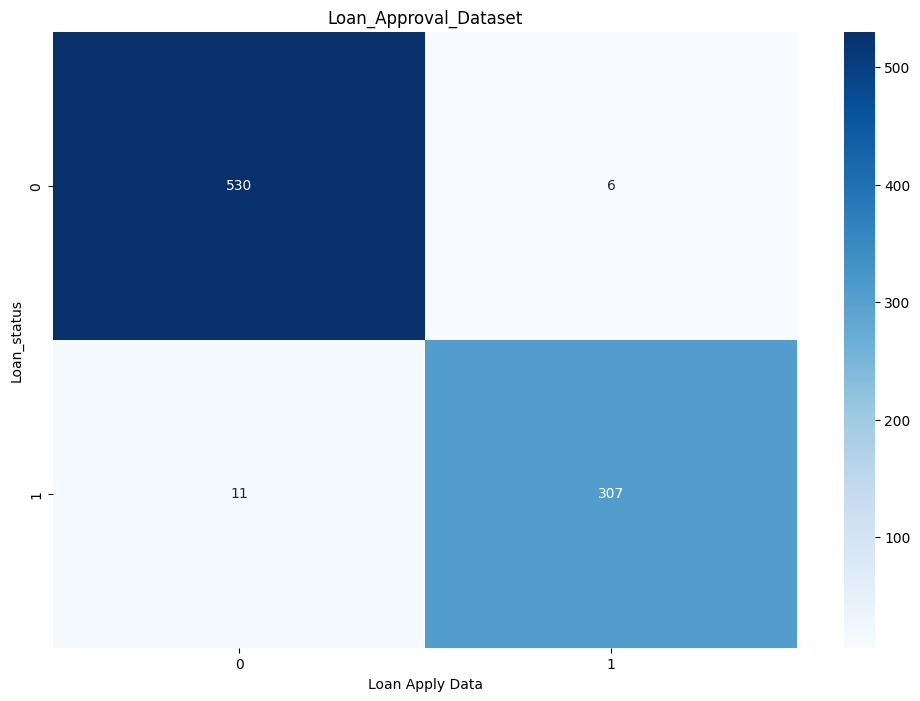

In [ ]:
# Visualize Confusion Matrix
# Create a figure of size 12x8 inches
plt.figure(figsize=(12, 8))
# Plot confusion matrix as heatmap
sns.heatmap(confusion_matrix(y_test, y_pre),annot=True,fmt="d",cmap="Blues")
# Add title and axis labels for clarity
plt.title("Loan_Approval_Dataset")
plt.xlabel("Loan Apply Data")
plt.ylabel("Loan_status")

In [ ]:
# Train Logistic Regression Model
# Initialize Logistic Regression model
lr=LogisticRegression()
# Train (fit) the model using the training dataset
lr.fit(X_train,y_train)
# Make predictions using Logistic Regression
y_pred=lr.predict(X_test)



c:\Users\Just Do it\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Evaluate Decision Tree model
# Calculate accuracy: proportion of correct predictions
accu_score_lr=accuracy_score(y_test,y_pred)
# Calculate precision: out of predicted positives, how many are truly positive
prec_score_lr=precision_score(y_test,y_pred)
# Calculate recall: out of actual positives, how many are predicted correctly
recal_score_lr=recall_score(y_test,y_pred)
# Calculate F1-score: harmonic mean of precision and recall
f1_scor_lr=f1_score(y_test,y_pred)
# Generate confusion matrix: shows TP, FP, FN, TN
confu_matrix_lr=confusion_matrix(y_test,y_pred)

# Print all evaluation results

print(f"Accuracy Score: {accu_score_lr}")
print(f"precision_score: {prec_score_lr}")
print(f"recall_score: {recal_score_lr}")
print(f"f1_score: {f1_scor_lr}")
print(f"Confusion Matrix:\n{confu_matrix_lr}")

Accuracy Score: 0.6323185011709602
precision_score: 0.5303030303030303
recall_score: 0.11006289308176101
f1_score: 0.18229166666666666
Confusion Matrix:
[[505  31]
 [283  35]]


Text(120.72222222222221, 0.5, 'Loan_status')

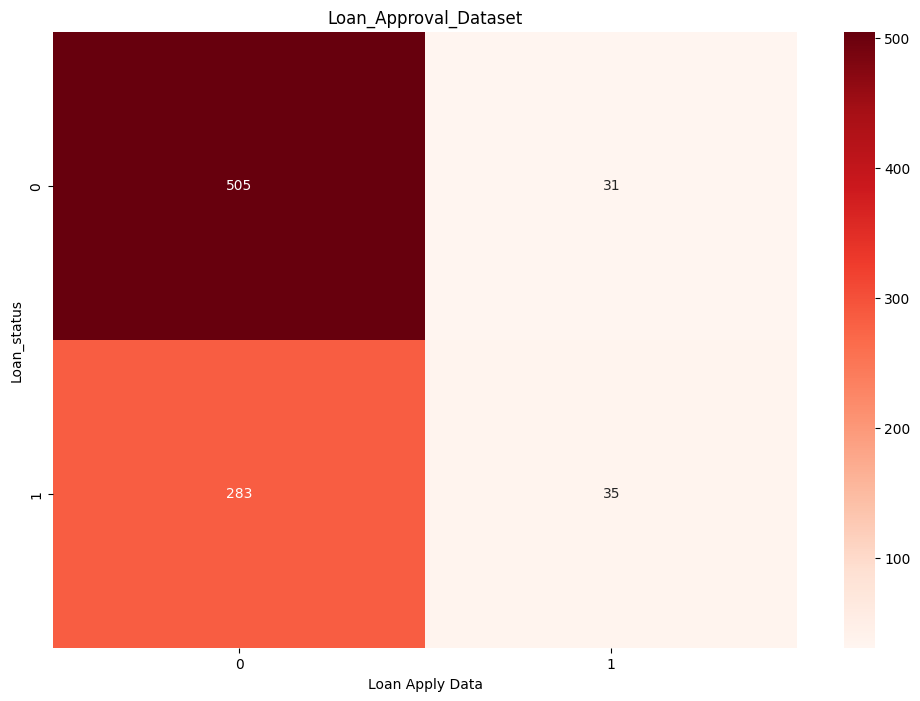

In [ ]:
# Visualize Confusion Matrix
# Create a figure of size 12x8 inches
plt.figure(figsize=(12,8))
# Plot confusion matrix as heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Reds")
# Add title and axis labels for clarity
plt.title("Loan_Approval_Dataset")
plt.xlabel("Loan Apply Data")
plt.ylabel("Loan_status")

In [ ]:
# Print accuracy socre both model 

# Print accuracy score of Decision Tree model
print(f"DecisionTreeClassifier accuracy score: {accu_score}")
# Print accuracy score of Logistic Regression model
print(f"logistic regression accuracy score: {accu_score_lr}")

DecisionTreeClassifier accuracy score: 0.9800936768149883
logistic regression accuracy score: 0.6323185011709602


(0.0, 1.0)

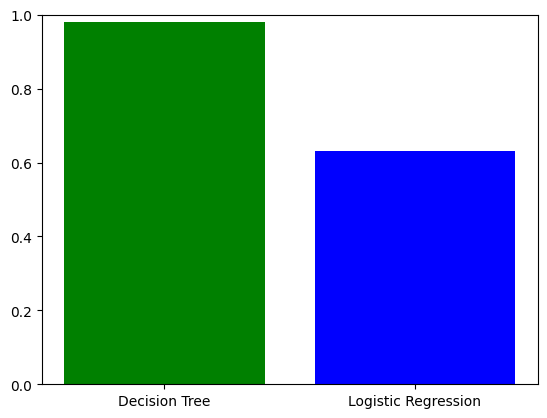

In [ ]:
# accuracy scores
accu_score_dt = 0.98  # Decision Tree accuracy
accu_score_lr = 0.63  # Logistic Regression accuracy

# Models and scores
models = ['Decision Tree', 'Logistic Regression']
scores = [accu_score_dt, accu_score_lr]
plt.bar(models,scores, color=['green', 'blue'])
plt.ylim(0, 1)